---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

## Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# loading datasets
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [4]:
# Exploring datasets
print(audit_risk.shape)
print(trial.shape)

(776, 27)
(776, 18)


In [5]:
audit_risk.info() 
#one missing values in Money_Value, and Location_ID dtype is object; need to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [6]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [7]:
trial.info() #No missing values but Location_ID is object; need to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [8]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [9]:
# Remove categorical values in the column of LOCATION_ID
# Did not assign new values because they could be already one of the LOCATION_ID
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'LOHARU']
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'NUH']
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'SAFIDON']

trial = trial[trial.LOCATION_ID != 'LOHARU']
trial = trial[trial.LOCATION_ID != 'NUH']
trial = trial[trial.LOCATION_ID != 'SAFIDON']

In [10]:
# Changing dtype(object to integer)
audit_risk['LOCATION_ID'] = pd.to_numeric(audit_risk['LOCATION_ID'])
trial['LOCATION_ID'] = pd.to_numeric(trial['LOCATION_ID'])

In [11]:
# Removing duplicated columns
# We removed duplicated parameters with different scales in advance 
trial.drop(['Sector_score','LOCATION_ID','PARA_A','SCORE_A',
            'PARA_B','SCORE_B','TOTAL','numbers','District','Money_Value','History','Score','Risk'], axis=1, inplace = True)

In [12]:
# Dealing with missing values
print(audit_risk.isnull().sum().sort_values(ascending = False))
audit_risk['Money_Value'] = audit_risk.fillna(audit_risk['Money_Value'].mean())

Money_Value       1
Risk              0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Score_MV          0
Audit_Risk        0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Sector_score      0
dtype: int64


In [13]:
trial.isnull().sum().sort_values(ascending = False)

History_score    0
LOSS_SCORE       0
Loss             0
MONEY_Marks      0
Marks            0
dtype: int64

In [14]:
# Checking the shape again 
print(audit_risk.shape)
print(trial.shape)

(773, 27)
(773, 5)


In [15]:
# Merging datasets
df = pd.concat([audit_risk, trial], axis=1)
df.shape

(773, 32)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 775
Data columns (total 32 columns):
Sector_score      773 non-null float64
LOCATION_ID       773 non-null int64
PARA_A            773 non-null float64
Score_A           773 non-null float64
Risk_A            773 non-null float64
PARA_B            773 non-null float64
Score_B           773 non-null float64
Risk_B            773 non-null float64
TOTAL             773 non-null float64
numbers           773 non-null float64
Score_B.1         773 non-null float64
Risk_C            773 non-null float64
Money_Value       773 non-null float64
Score_MV          773 non-null float64
Risk_D            773 non-null float64
District_Loss     773 non-null int64
PROB              773 non-null float64
RiSk_E            773 non-null float64
History           773 non-null int64
Prob              773 non-null float64
Risk_F            773 non-null float64
Score             773 non-null float64
Inherent_Risk     773 non-null float64
CONT

## Exploring & Scaling dataset

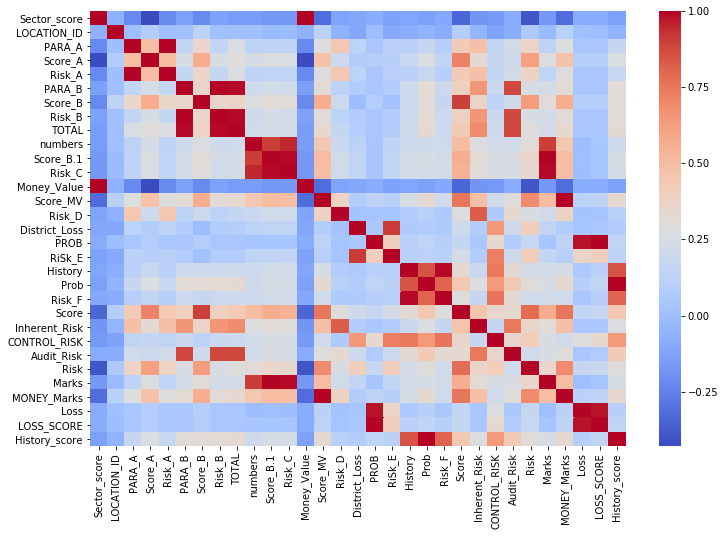

In [17]:
#Exploring dataset - (1) Correlation within variables
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Detection_Risk'], axis=1).corr(), cmap = 'coolwarm')

In [18]:
# Correlation with target variables
cor = pd.DataFrame(df.drop("Audit_Risk", axis=1).apply(lambda x: x.corr(df.Audit_Risk)).sort_values(ascending = False)).rename(columns = {0:'Correlation'})
cor.dropna()

,Correlation
TOTAL,0.888086
PARA_B,0.887780
Risk_B,0.887556
Inherent_Risk,0.750873
History_score,0.431217
Prob,0.431217
CONTROL_RISK,0.357872
Risk_D,0.334091
Score,0.332883
History,0.329682


In [19]:
from sklearn.preprocessing import MinMaxScaler # Used MinMaxScaler
reg_data = df.drop(['Audit_Risk','Risk'], axis=1)
reg_target = df['Audit_Risk']

In [20]:
# Splitting training and test data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(reg_data, reg_target, random_state=0)

# Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Classification Task

In [21]:
# Creating dataset for classification task
clf_data = df.drop(['Audit_Risk','Risk'], axis=1)
clf_target = df['Risk']

# Splitting training and test data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(clf_data, clf_target, random_state=0)

# Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,classification_report


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [128]:
# GridSearch Plot
def grid_score_plot(df,col,train,test,title, xlabel,ylabel,annot=True):
    fig = plt.figure(figsize=(10,6))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111, facecolor='white')
    ax.plot(df[col], df[train], c ='b', linewidth=2, alpha=0.6, label='Train Accuracy Score',marker='o')
    ax.plot(df[col], df[test], c ='r', linewidth=2, alpha=0.6, label='Test Accuracy Score', marker='o')
    ax.legend()
    if(annot==True):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='gray')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='gray')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    plt.grid(zorder=0)
    plt.show()

## Part 1 Result

In [29]:
old_table=pd.DataFrame({'Model Name':['K Neighbors Classifier','Logistic Regression','Linear Support Vector Machine Classifier',
                                      'RBF Kernelized Support Vector Machine Classifier','Decision Tree Classifier'],
                        'Model Parameters':["n_neighbors: 10","C: 10 , penalty: l1","C: 10, dual: False, loss: squared_hinge, penalty: l1",
                                            "C: 100, gamma: 0.001","max_depth: 5, max_features: 10"],
                        'Train Accuracy':[0.950092,0.994455,0.998152,0.983364,0.992606],
                        'Test Accuracy':[0.939655,0.995690,0.995690,0.982759,0.995690],
                        'Train AUC Score':[0.937998,0.993763,0.997642,0.981290,0.990566],
                        'Test AUC Score':[0.926510,0.994624,0.994624,0.978495,0.994624]})
old_table.index = old_table['Model Name']
old_table.drop(['Model Name'],axis=1, inplace=True)
old_table

,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
Model Name,,,,,
K Neighbors Classifier,n_neighbors: 10,0.950092,0.939655,0.937998,0.926510
Logistic Regression,"C: 10 , penalty: l1",0.994455,0.995690,0.993763,0.994624
Linear Support Vector Machine Classifier,"C: 10, dual: False, loss: squared_hinge, penal...",0.998152,0.995690,0.997642,0.994624
RBF Kernelized Support Vector Machine Classifier,"C: 100, gamma: 0.001",0.983364,0.982759,0.981290,0.978495
Decision Tree Classifier,"max_depth: 5, max_features: 10",0.992606,0.995690,0.990566,0.994624


#### All the models used within the ensemble methods are run with the hypertuned parameters identified in Part 1

In [32]:
## Base Models for all Ensemble Methods
knn_clf= KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)
log_clf = LogisticRegression(C=10,penalty='l1',random_state=101)
log_clf.fit(X_train, y_train)
svm_clf = LinearSVC(C = 10, dual=False,loss='squared_hinge',penalty='l1',random_state=101)
svm_clf.fit(X_train, y_train)
dtree_clf = DecisionTreeClassifier(max_depth=5,max_features=10,random_state=101)
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

## Voting Classifier Method

### (1) Voting classifiers - Hard

_An ensemble model can improve performance like accuracy and model fit._
_Hard voting makes the final prediction by a simple taking majority of votes to classify data thereby improving accuracy._
_Used Logistic, Decision Tree and LinearSVC as internal algorithms for the ensemble models_

In [35]:
voting_hard_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_hard_clf.fit(X_train, y_train)

print("Hard Voting: Accuracy Score")
print()
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_hard_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'Test Accuracy Score {:.4f}'.format(accuracy_score(y_test, y_pred)))
print()

Hard Voting: Accuracy Score

LogisticRegression Test Accuracy Score 0.9794
KNeighborsClassifier Test Accuracy Score 0.9381
LinearSVC Test Accuracy Score 0.9897
VotingClassifier Test Accuracy Score 0.9794



In [36]:
print("Hard Voting: ROC AUC Score")
print()
from sklearn.metrics import roc_auc_score
for clf in (log_clf, knn_clf, svm_clf, voting_hard_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'Test ROC AUC Score {:.4f}'.format(roc_auc_score(y_test, y_pred)))
print()

Hard Voting: ROC AUC Score

LogisticRegression Test ROC AUC Score 0.9726
KNeighborsClassifier Test ROC AUC Score 0.9178
LinearSVC Test ROC AUC Score 0.9863
VotingClassifier Test ROC AUC Score 0.9726



### (2) Voting classifiers - Soft

_Soft Voting can only be done when all your classifiers can calculate probabilities for the outcomes. Soft voting arrives at the best result by averaging out the probabilities calculated by individual algorithms._
_Used KNN, Logistic, Decision Tree and LinearSVC as internal algorithms for the ensemble models_

In [42]:
voting_soft_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('dtree', dtree_clf)], voting='soft')
voting_soft_clf.fit(X_train, y_train)

print("Soft Voting: Accuracy Score")
print()

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, dtree_clf, voting_soft_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'Test Accuracy Score {:.4f}'.format(accuracy_score(y_test, y_pred)))

Soft Voting: Accuracy Score

LogisticRegression Test Accuracy Score 0.9794
KNeighborsClassifier Test Accuracy Score 0.9381
DecisionTreeClassifier Test Accuracy Score 1.0000
VotingClassifier Test Accuracy Score 0.9948


In [43]:
print("Soft Voting: ROC AUC Score")
print()
from sklearn.metrics import roc_auc_score
for clf in (log_clf, knn_clf, dtree_clf, voting_soft_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'Test ROC AUC Score {:.4f}'.format(roc_auc_score(y_test, y_pred)))
print()

Soft Voting: ROC AUC Score

LogisticRegression Test ROC AUC Score 0.9726
KNeighborsClassifier Test ROC AUC Score 0.9178
DecisionTreeClassifier Test ROC AUC Score 1.0000
VotingClassifier Test ROC AUC Score 0.9932



## Bagging

_short for “Bootstrap aggregating"_

### (1) Bagging Classifier: Logistic Regression

In [45]:
#importing models
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, classification_report

In [61]:
#Logistic Regression
log_bag = BaggingClassifier(log_clf, bootstrap=True, n_jobs=-1, random_state=101)
log_bag.fit(X_train, y_train)

In [62]:
print("Accuracy Score")
print("Train Accuracy Score: {:4f}".format(log_bag.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(log_bag.score(X_test, y_test)))

Accuracy Score
Train Accuracy Score: 0.991364
Test Accuracy Score: 0.979381


In [63]:
#ROC AUC Score
print("ROC AUC Score")
print("Train AUC Score: {:4f}".format(roc_auc_score(y_train, log_bag.predict(X_train))))
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, log_bag.predict(X_test))))

ROC AUC Score
Train AUC Score: 0.990653
Test AUC Score: 0.972603


### (2) Bagging Classifier: Decision Tree

In [64]:
dtree_bag = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, n_jobs=-1, random_state=101)
dtree_bag.fit(X_train, y_train)

In [65]:
print("Accuracy Score")
print("Train Accuracy Score: {:4f}".format(dtree_bag.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(dtree_bag.score(X_test, y_test)))

Accuracy Score
Train Accuracy Score: 0.991364
Test Accuracy Score: 0.994845


In [66]:
#ROC AUC Score
print("ROC AUC Score")
print("Train AUC Score: {:4f}".format(roc_auc_score(y_train, dtree_bag.predict(X_train))))
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, dtree_bag.predict(X_test))))

ROC AUC Score
Train AUC Score: 0.989224
Test AUC Score: 0.993151


## Pasting

_Bagging without boostrap_

### (1) Pasting Classifier: Logistic Regression

In [67]:
log_pas = BaggingClassifier(log_clf, bootstrap=False, n_jobs=-1, random_state=0)
log_pas.fit(X_train, y_train)

In [68]:
print("Accuracy Score")
print("Train Accuracy Score: {:4f}".format(log_pas.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(log_pas.score(X_test, y_test)))

Accuracy Score
Train Accuracy Score: 0.991364
Test Accuracy Score: 0.979381


In [69]:
#ROC AUC Score
print("ROC AUC Score")
print("Train AUC Score: {:4f}".format(roc_auc_score(y_train, log_pas.predict(X_train))))
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, log_pas.predict(X_test))))

ROC AUC Score
Train AUC Score: 0.990653
Test AUC Score: 0.972603


### (2) Pasting Classifier: Linear SVC

In [71]:
#Linear SVC
svm_pas = BaggingClassifier(svm_clf, bootstrap=True, n_jobs=-1, random_state=0)
svm_pas.fit(X_train, y_train)

In [72]:
print("Accuracy Score")
print("Train Accuracy Score: {:4f}".format(svm_pas.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(svm_pas.score(X_test, y_test)))

Accuracy Score
Train Accuracy Score: 0.994819
Test Accuracy Score: 0.989691


In [73]:
#ROC AUC Score
print("ROC AUC Score")
print("Train AUC Score: {:4f}".format(roc_auc_score(y_train, svm_pas.predict(X_train))))
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, svm_pas.predict(X_test))))

ROC AUC Score
Train AUC Score: 0.994249
Test AUC Score: 0.986301


##  Adaboost 

### (1) Adaboost Classifier: Logistic Regression

In [78]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LogisticRegression(C=10, penalty='l1', random_state=101), learning_rate=0.05, n_estimators=50)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=101, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.05, n_estimators=50, random_state=None)

In [79]:
print("Accuracy Score")
print("Train Accuracy Score: {:4f}".format(ada_clf.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(ada_clf.score(X_test, y_test)))

Accuracy Score
Train Accuracy Score: 0.875648
Test Accuracy Score: 0.845361


In [80]:
#ROC AUC Score
print("ROC AUC Score")
print("Train AUC Score: {:4f}".format(roc_auc_score(y_train, ada_clf.predict(X_train))))
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, ada_clf.predict(X_test))))

ROC AUC Score
Train AUC Score: 0.856970
Test AUC Score: 0.818974


### (2) Adaboost Classifier: Linear SVC

In [85]:
ada_clf = AdaBoostClassifier(LinearSVC(C= 10, penalty = 'l1', dual=False, loss='squared_hinge'), 
                             algorithm='SAMME', learning_rate=0.0001, n_estimators=3)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
          learning_rate=0.0001, n_estimators=3, random_state=None)

In [86]:
print("Accuracy Score")
print("Train Accuracy Score: {:4f}".format(ada_clf.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(ada_clf.score(X_test, y_test)))

Accuracy Score
Train Accuracy Score: 0.994819
Test Accuracy Score: 0.989691


In [87]:
#ROC AUC Score
print("ROC AUC Score")
print("Train AUC Score: {:4f}".format(roc_auc_score(y_train, ada_clf.predict(X_train))))
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, ada_clf.predict(X_test))))

ROC AUC Score
Train AUC Score: 0.994249
Test AUC Score: 0.986301


## Gradient boosting 

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=5, subsample=0.75)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.75, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [96]:
print("Accuracy Score")
print("Train Accuracy Score: {:4f}".format(gb_clf.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(gb_clf.score(X_test, y_test)))

Accuracy Score
Train Accuracy Score: 0.998273
Test Accuracy Score: 0.989691


In [97]:
#ROC AUC Score
print("ROC AUC Score")
print("Train AUC Score: {:4f}".format(roc_auc_score(y_train, gb_clf.predict(X_train))))
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, gb_clf.predict(X_test))))

ROC AUC Score
Train AUC Score: 0.997845
Test AUC Score: 0.986301


### PCA

Number of dimensions: 8
Explained Variance Ratio: [0.46595835 0.16895308 0.08676521 0.07537057 0.05218222 0.04335058
 0.03557504 0.02864233]
Cumulative Explained Variance Ratio: [0.466  0.635  0.7218 0.7972 0.8494 0.8928 0.9284 0.957 ]


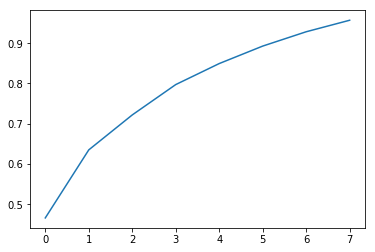

In [103]:
from sklearn.decomposition import PCA

# Dimension Reduction
pca = PCA(0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var, decimals=4))

print('Number of dimensions:', pca.n_components_)
print('Explained Variance Ratio:', var)
print('Cumulative Explained Variance Ratio:',var1)

plt.plot(var1)

In [106]:
print(X_reduced_train.shape)
print(X_reduced_test.shape)

(579, 8)
(194, 8)


### KNN Classifier

In [109]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,11,1)}

#cv =5
knn_grid_search = GridSearchCV(knn, parameters, scoring ='roc_auc', cv=5, n_jobs = -1, verbose = 3)
knn_grid_search.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_grid_search.best_score_))
print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


cv=5
Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.9890



[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.9s finished


In [111]:
knn_result = pd.DataFrame(knn_grid_search.cv_results_)

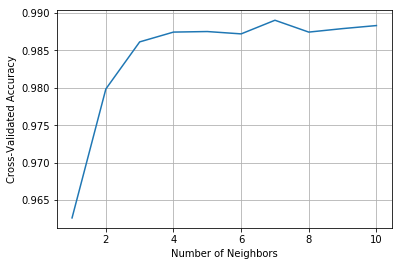

In [112]:
plt.plot(np.arange(1,11,1), knn_result['mean_test_score'] )
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()                          #Get the highest accuracy when k=7

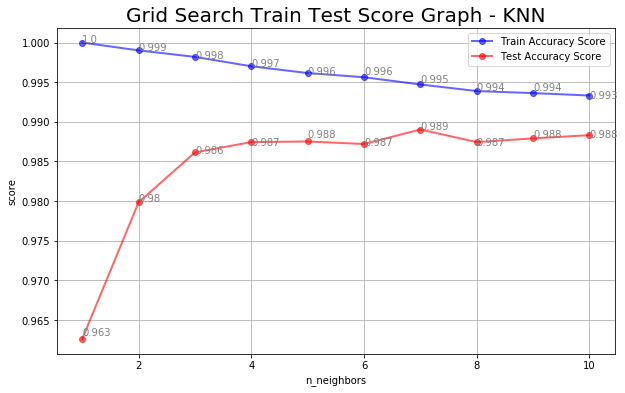

In [129]:
grid_score_plot(knn_result,'param_n_neighbors','mean_train_score','mean_test_score',
                'Grid Search Train Test Score Graph - KNN','n_neighbors','score')

In [114]:
knnclf_accuracy_train = knn_grid_search.best_estimator_.score(X_reduced_train, y_train)
knnclf_accuracy_test = knn_grid_search.best_estimator_.score(X_reduced_test, y_test)

print('KNN Classifier - Train Accuracy: %.4f'%knnclf_accuracy_train)
print('KNN Classifier - Test Accuracy: %.4f '%knnclf_accuracy_test)

KNN Classifier - Train Accuracy: 0.9637
KNN Classifier - Test Accuracy: 0.9433 


In [115]:
knnclf_auc_train = roc_auc_score(y_train, knn_grid_search.predict(X_reduced_train))
knnclf_auc_test = roc_auc_score(y_test, knn_grid_search.predict(X_reduced_test))

print('KNN Classifier - Train ROC AUC Score: %.4f'%knnclf_auc_train)
print('KNN Classifier - Test ROC AUC Score: %.4f '%knnclf_auc_test)

KNN Classifier - Train ROC AUC Score: 0.9576
KNN Classifier - Test ROC AUC Score: 0.9247 


In [123]:
report_table =[['KNN Classification', str(knn_grid_search.best_params_).replace('{','', ).replace("'",'').replace('}',''),
                (knnclf_accuracy_train), (knnclf_accuracy_test), (knnclf_auc_train),(knnclf_auc_test)]]

### Logistic Regression Classifier

In [116]:
model = LogisticRegression(random_state=101)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

#cv =5
log_grid_search = GridSearchCV(model, parameters, cv=5, scoring='roc_auc', n_jobs = -1,verbose=3)
log_grid_search.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(log_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(log_grid_search.best_score_))
print()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s


cv=5
Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation score: 0.9935



[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished


In [117]:
log_result = pd.DataFrame(log_grid_search.cv_results_)

In [118]:
log_result['parameters'] = log_result.params.apply(lambda x: str(x).replace('{','').replace('}',''))
log_result['index'] = log_result.index

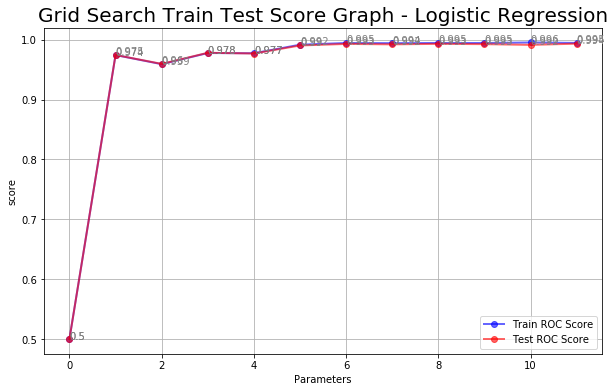

,0,1,2,3,4,5,6,7,8,9,10,11
index,0,1,2,3,4,5,6,7,8,9,10,11
parameters,"'C': 0.001, 'penalty': 'l1'","'C': 0.001, 'penalty': 'l2'","'C': 0.01, 'penalty': 'l1'","'C': 0.01, 'penalty': 'l2'","'C': 0.1, 'penalty': 'l1'","'C': 0.1, 'penalty': 'l2'","'C': 1, 'penalty': 'l1'","'C': 1, 'penalty': 'l2'","'C': 10, 'penalty': 'l1'","'C': 10, 'penalty': 'l2'","'C': 100, 'penalty': 'l1'","'C': 100, 'penalty': 'l2'"


In [119]:
grid_score_plot(log_result,'index','mean_train_score','mean_test_score',
               'Grid Search Train Test Score Graph - Logistic Regression','Parameters','score')
log_result[['index','parameters']].transpose()

In [120]:
logistic_accuracy_train = log_grid_search.best_estimator_.score(X_reduced_train, y_train)
logistic_accuracy_test = log_grid_search.best_estimator_.score(X_reduced_test, y_test)

print('Logistic Regression Classifier - Train Accuracy: %.4f'%logistic_accuracy_train)
print('Logistic Regression Classifier - Test Accuracy: %.4f '%logistic_accuracy_test)

Logistic Regression Classifier - Train Accuracy: 0.9672
Logistic Regression Classifier - Test Accuracy: 0.9794 


In [121]:
logistic_auc_train = roc_auc_score(y_train, log_grid_search.predict(X_reduced_train))
logistic_auc_test = roc_auc_score(y_test, log_grid_search.predict(X_reduced_test))

print('Logstic Regression - Train ROC AUC Score: %.4f'%logistic_auc_train)
print('Logistic Regression - Test ROC AUC Score: %.4f '%logistic_auc_test)

Logstic Regression - Train ROC AUC Score: 0.9641
Logistic Regression - Test ROC AUC Score: 0.9726 


In [124]:
report_table = report_table + [['Logistic Regression', str(log_grid_search.best_params_).replace('{','', ).replace("'",'').replace('}',''), 
                                logistic_accuracy_train, logistic_accuracy_test, logistic_auc_train,logistic_auc_test]]

### Linear SVC Classifier

In [125]:
model = LinearSVC()
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l2'],'loss':['hinge','squared_hinge']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1'], 'dual':[False], 'loss':['squared_hinge']}]

#cv =5
lin_svc_grid = GridSearchCV(model, parameters, cv=5, n_jobs = -1, verbose=3)
lin_svc_grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(lin_svc_grid.best_params_))
print("Best cross-validation score: {:.4f}".format(lin_svc_grid.best_score_))
print()


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  90 | elapsed:    0.1s remaining:    1.0s


cv=5
Best parameters: {'C': 1, 'loss': 'hinge', 'penalty': 'l2'}
Best cross-validation score: 0.9655



[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.3s finished
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [131]:
lin_svc_result = pd.DataFrame(lin_svc_grid.cv_results_)

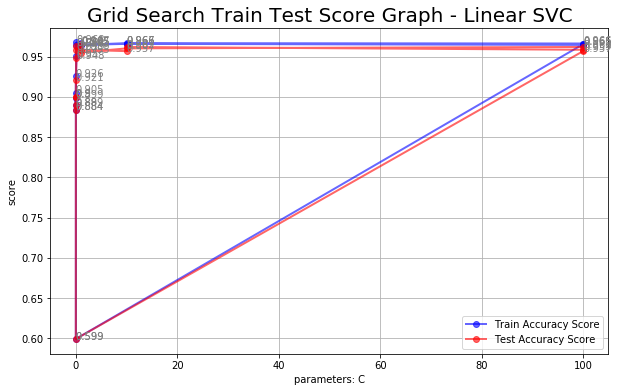

In [130]:
grid_score_plot(lin_svc_result,'param_C','mean_train_score','mean_test_score',
               'Grid Search Train Test Score Graph - Linear SVC','parameters: C' ,'score')

In [133]:
lsvc_accuracy_train = lin_svc_grid.best_estimator_.score(X_reduced_train, y_train)
lsvc_accuracy_test = lin_svc_grid.best_estimator_.score(X_reduced_test, y_test) 

print('Linear SVC - Train Accuracy: %.4f'%lsvc_accuracy_train)
print('Linear SVC - Test Accuracy: %.4f '%lsvc_accuracy_test)

Linear SVC - Train Accuracy: 0.9706
Linear SVC - Test Accuracy: 0.9742 


In [134]:
lsvc_auc_train = roc_auc_score(y_train, lin_svc_grid.predict(X_reduced_train))
lsvc_auc_test = roc_auc_score(y_test, lin_svc_grid.predict(X_reduced_test))

print('Linear SVC - Train ROC AUC Score: %.4f'%lsvc_auc_train)
print('Linear SVC - Test ROC AUC Score: %.4f '%lsvc_auc_test)

Linear SVC - Train ROC AUC Score: 0.9655
Linear SVC - Test ROC AUC Score: 0.9658 


In [135]:
report_table = report_table + [['Linear SVC', str(lin_svc_grid.best_params_).replace('{','', ).replace("'",'').replace('}',''), 
                                lsvc_accuracy_train, lsvc_accuracy_test, lsvc_auc_train,lsvc_auc_test]]

### RBF Kernel SVC

In [136]:
model = SVC(kernel='rbf')
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001,0.01,0.1,1,10,100]}]

#cv =5
rbf_svc_grid = GridSearchCV(model, parameters, scoring = 'roc_auc',cv=5, n_jobs = -1, verbose=3)
rbf_svc_grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(rbf_svc_grid.best_params_))
print("Best cross-validation score: {:.4f}".format(rbf_svc_grid.best_score_))
print()


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


cv=5
Best parameters: {'C': 0.001, 'gamma': 1}
Best cross-validation score: 0.9948



[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.9s finished


In [137]:
rbf_svc_result = pd.DataFrame(rbf_svc_grid.cv_results_)
rbf_svc_result['parameters'] = rbf_svc_result.params.apply(lambda x: str(x).replace('{','').replace('}',''))
rbf_svc_result['index'] = rbf_svc_result.index

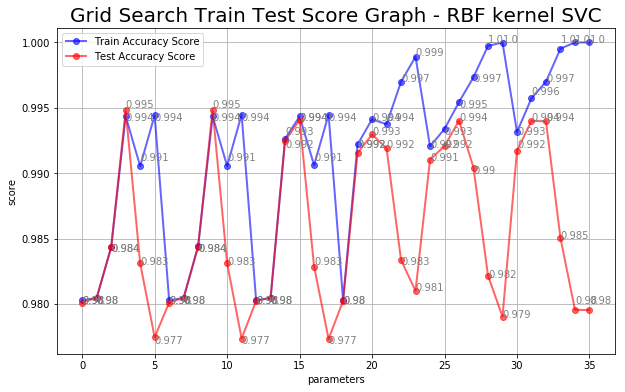

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
index,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
parameters,"'C': 0.001, 'gamma': 0.001","'C': 0.001, 'gamma': 0.01","'C': 0.001, 'gamma': 0.1","'C': 0.001, 'gamma': 1","'C': 0.001, 'gamma': 10","'C': 0.001, 'gamma': 100","'C': 0.01, 'gamma': 0.001","'C': 0.01, 'gamma': 0.01","'C': 0.01, 'gamma': 0.1","'C': 0.01, 'gamma': 1",...,"'C': 10, 'gamma': 0.1","'C': 10, 'gamma': 1","'C': 10, 'gamma': 10","'C': 10, 'gamma': 100","'C': 100, 'gamma': 0.001","'C': 100, 'gamma': 0.01","'C': 100, 'gamma': 0.1","'C': 100, 'gamma': 1","'C': 100, 'gamma': 10","'C': 100, 'gamma': 100"


In [138]:
grid_score_plot(rbf_svc_result,'index','mean_train_score','mean_test_score',
               'Grid Search Train Test Score Graph - RBF kernel SVC','parameters','score')
rbf_svc_result[['index','parameters']].transpose()

In [139]:
rbf_svc_accuracy_train = rbf_svc_grid.best_estimator_.score(X_reduced_train, y_train)
rbf_svc_accuracy_test = rbf_svc_grid.best_estimator_.score(X_reduced_test, y_test)

print('RBF SVC - Train Accuracy: %.4f'%rbf_svc_accuracy_train)
print('RBF SVC - Test Accuracy: %.4f '%rbf_svc_accuracy_test)

RBF SVC - Train Accuracy: 0.5993
RBF SVC - Test Accuracy: 0.6237 


In [140]:
rbf_svc_auc_train = roc_auc_score(y_train, rbf_svc_grid.predict(X_reduced_train))
rbf_svc_auc_test = roc_auc_score(y_test, rbf_svc_grid.predict(X_reduced_test))

print('RBF Kernel SVC - Train ROC AUC Score: %.4f'%rbf_svc_auc_train)
print('RBF Kernel SVC - Test ROC AUC Score: %.4f '%rbf_svc_auc_test)

RBF Kernel SVC - Train ROC AUC Score: 0.5000
RBF Kernel SVC - Test ROC AUC Score: 0.5000 


In [141]:
report_table  = report_table +[['RBF Kernel SVC', str(rbf_svc_grid.best_params_).replace('{','', ).replace("'",'').replace('}',''), 
                                rbf_svc_accuracy_train, rbf_svc_accuracy_test,rbf_svc_auc_train,rbf_svc_auc_test]]

### Decision Tree Classifier

In [144]:
model = DecisionTreeClassifier()
parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10], 'max_features':[1,2,3,4,5]}]

#cv =5
dtree_grid = GridSearchCV(model, parameters, scoring='roc_auc', cv=5, n_jobs = -1, verbose = 3)
dtree_grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(dtree_grid.best_params_))
print("Best cross-validation score: {:.4f}".format(dtree_grid.best_score_))
print()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.1s


cv=5
Best parameters: {'max_depth': 4, 'max_features': 5}
Best cross-validation score: 0.9708



[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.8s finished
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [145]:
dtree_result = pd.DataFrame(dtree_grid.cv_results_)
dtree_result['parameters'] = dtree_result.params.apply(lambda x: str(x).replace('{','').replace('}',''))
dtree_result['index'] = dtree_result.index

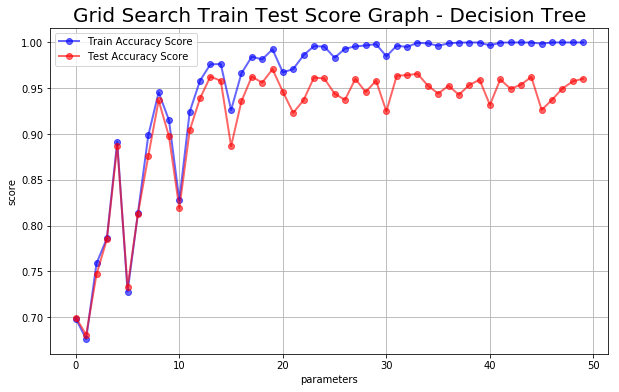

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
index,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
parameters,"'max_depth': 1, 'max_features': 1","'max_depth': 1, 'max_features': 2","'max_depth': 1, 'max_features': 3","'max_depth': 1, 'max_features': 4","'max_depth': 1, 'max_features': 5","'max_depth': 2, 'max_features': 1","'max_depth': 2, 'max_features': 2","'max_depth': 2, 'max_features': 3","'max_depth': 2, 'max_features': 4","'max_depth': 2, 'max_features': 5",...,"'max_depth': 9, 'max_features': 1","'max_depth': 9, 'max_features': 2","'max_depth': 9, 'max_features': 3","'max_depth': 9, 'max_features': 4","'max_depth': 9, 'max_features': 5","'max_depth': 10, 'max_features': 1","'max_depth': 10, 'max_features': 2","'max_depth': 10, 'max_features': 3","'max_depth': 10, 'max_features': 4","'max_depth': 10, 'max_features': 5"


In [148]:
grid_score_plot(dtree_result,'index','mean_train_score','mean_test_score',
               'Grid Search Train Test Score Graph - Decision Tree','parameters','score', False)
dtree_result[['index','parameters']].transpose()

In [149]:
dtree_accuracy_train = dtree_grid.best_estimator_.score(X_reduced_train, y_train)
dtree_accuracy_test = dtree_grid.best_estimator_.score(X_reduced_test, y_test)

print('Decision Tree Classofier - Train Accuracy: %.4f'%dtree_accuracy_train)
print('Decision Tree Classifier - Test Accuracy: %.4f '%dtree_accuracy_test)

Decision Tree Classofier - Train Accuracy: 0.9706
Decision Tree Classifier - Test Accuracy: 0.9381 


In [150]:
dtree_auc_train = roc_auc_score(y_train, dtree_grid.predict(X_reduced_train))
dtree_auc_test = roc_auc_score(y_test, dtree_grid.predict(X_reduced_test))

print('Decision Tree Classifier - Train ROC AUC Score: %.4f'%dtree_auc_train)
print('Decision Tree Classifier - Test ROC AUC Score: %.4f '%dtree_auc_test)

Decision Tree Classifier - Train ROC AUC Score: 0.9641
Decision Tree Classifier - Test ROC AUC Score: 0.9178 


In [151]:
report_table  = report_table +[['Decision Tree', str(dtree_grid.best_params_).replace('{','', ).replace("'",'').replace('}',''), 
                                dtree_accuracy_train, dtree_accuracy_test,dtree_auc_train,dtree_auc_test]]

In [152]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 
                                              'Train Accuracy', 'Test Accuracy', 
                                              'Train AUC Score', 'Test AUC Score'])

In [153]:
report.index = report['Model Name']
report.drop(['Model Name'],axis=1, inplace=True)

In [154]:
report

,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
Model Name,,,,,
KNN Classification,n_neighbors: 7,0.963731,0.943299,0.957598,0.924658
Logistic Regression,"C: 100, penalty: l2",0.967185,0.979381,0.964051,0.972603
Linear SVC,"C: 1, loss: hinge, penalty: l2",0.970639,0.974227,0.965505,0.965753
RBF Kernel SVC,"C: 0.001, gamma: 1",0.599309,0.623711,0.500000,0.500000
Decision Tree,"max_depth: 4, max_features: 5",0.970639,0.938144,0.964076,0.917808


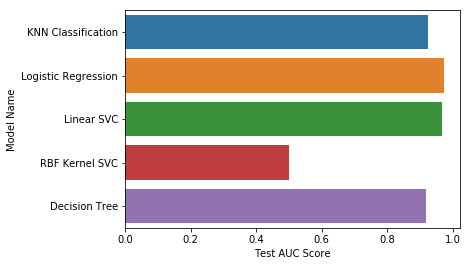

In [156]:
sns.barplot(y =report.index, x = 'Test AUC Score', data= report)

Train and test scores of Logistic Regression, Linear Support Vector Classifier and Decision Tree Classifier are on the higher end.
For all the other models, the train and test scores post PCA have drastically fallen down.

Logistic Regression Classifier is considered as the best model for the PCA applied dataset.

In [157]:
old_table

,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
Model Name,,,,,
K Neighbors Classifier,n_neighbors: 10,0.950092,0.939655,0.937998,0.926510
Logistic Regression,"C: 10 , penalty: l1",0.994455,0.995690,0.993763,0.994624
Linear Support Vector Machine Classifier,"C: 10, dual: False, loss: squared_hinge, penal...",0.998152,0.995690,0.997642,0.994624
RBF Kernelized Support Vector Machine Classifier,"C: 100, gamma: 0.001",0.983364,0.982759,0.981290,0.978495
Decision Tree Classifier,"max_depth: 5, max_features: 10",0.992606,0.995690,0.990566,0.994624


## Deep Learning (Keras)

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Defining model
model = Sequential()
model.add(Dense(12, input_dim=30,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
    
# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [172]:
# Fitting the model
model.fit(X_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
579/579 [==============================] - 1s 2ms/sample - loss: 0.6380 - acc: 0.6839
Epoch 2/100
579/579 [==============================] - 0s 619us/sample - loss: 0.4194 - acc: 0.9016
Epoch 3/100
579/579 [==============================] - 0s 612us/sample - loss: 0.2666 - acc: 0.9378
Epoch 4/100
579/579 [==============================] - 0s 627us/sample - loss: 0.1849 - acc: 0.9603
Epoch 5/100
579/579 [==============================] - 0s 620us/sample - loss: 0.1442 - acc: 0.9655
Epoch 6/100
579/579 [==============================] - 0s 662us/sample - loss: 0.1232 - acc: 0.9620
Epoch 7/100
579/579 [==============================] - 0s 683us/sample - loss: 0.1077 - acc: 0.9689
Epoch 8/100
579/579 [==============================] - 0s 615us/sample - loss: 0.0985 - acc: 0.9689
Epoch 9/100
579/579 [==============================] - 0s 717us/sample - loss: 0.0904 - acc: 0.9706
Epoch 10/100
579/579 [==============================] - 0s 612us/sample - loss: 0.0884 - acc: 0.9706
E

579/579 [==============================] - 0s 601us/sample - loss: 0.0222 - acc: 0.9948
Epoch 83/100
579/579 [==============================] - 0s 698us/sample - loss: 0.0216 - acc: 0.9948
Epoch 84/100
579/579 [==============================] - 0s 739us/sample - loss: 0.0214 - acc: 0.9965
Epoch 85/100
579/579 [==============================] - 0s 684us/sample - loss: 0.0209 - acc: 0.9914
Epoch 86/100
579/579 [==============================] - 0s 623us/sample - loss: 0.0209 - acc: 0.9931
Epoch 87/100
579/579 [==============================] - 0s 622us/sample - loss: 0.0196 - acc: 0.9948
Epoch 88/100
579/579 [==============================] - 0s 668us/sample - loss: 0.0203 - acc: 0.9931
Epoch 89/100
579/579 [==============================] - 0s 692us/sample - loss: 0.0198 - acc: 0.9931
Epoch 90/100
579/579 [==============================] - 0s 668us/sample - loss: 0.0190 - acc: 0.9931
Epoch 91/100
579/579 [==============================] - 0s 677us/sample - loss: 0.0187 - acc: 0.9931
Epo

In [176]:
# evaluating the model
model.evaluate(X_test, y_test)

194/194 [==============================] - 0s 93us/sample - loss: 0.0147 - acc: 1.0000


[0.014653323375372115, 1.0]

In [177]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


## End